# Figure S6 (Supplementary material)
### Visualize sediment resuspension forcing field

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr
from matplotlib.colors import ListedColormap
from constants import imin, imax, jmin, jmax, path_figure, land_color

%matplotlib inline

#### Parameters

In [2]:
# Colormap
N = 256
vals_cont = np.ones((N, 4))
vals_cont[:, 0] = np.linspace(117/N, 1, N)
vals_cont[:, 1] = np.linspace(82/N, 1, N)
vals_cont[:, 2] = np.linspace(60/N, 1, N)
sed_cmap = ListedColormap(vals_cont).reversed()

#### Files

In [3]:
# Pb model configuration ANHA12 mask
mesh         = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20230213.nc')
mesh_lon     = mesh['nav_lon'].values
mesh_lat     = mesh['nav_lat'].values
depths       = mesh['nav_lev'].values
mesh_bathy   = mesh['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)

In [4]:
# Erosion rate created by notebook forcing/sediment-resuspension.ipynb
err_file = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/Pb-202207-forcing/erosion_rate-Pb-20220713.nc')
erosion  = err_file['er_rate'].values

#### Figure

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


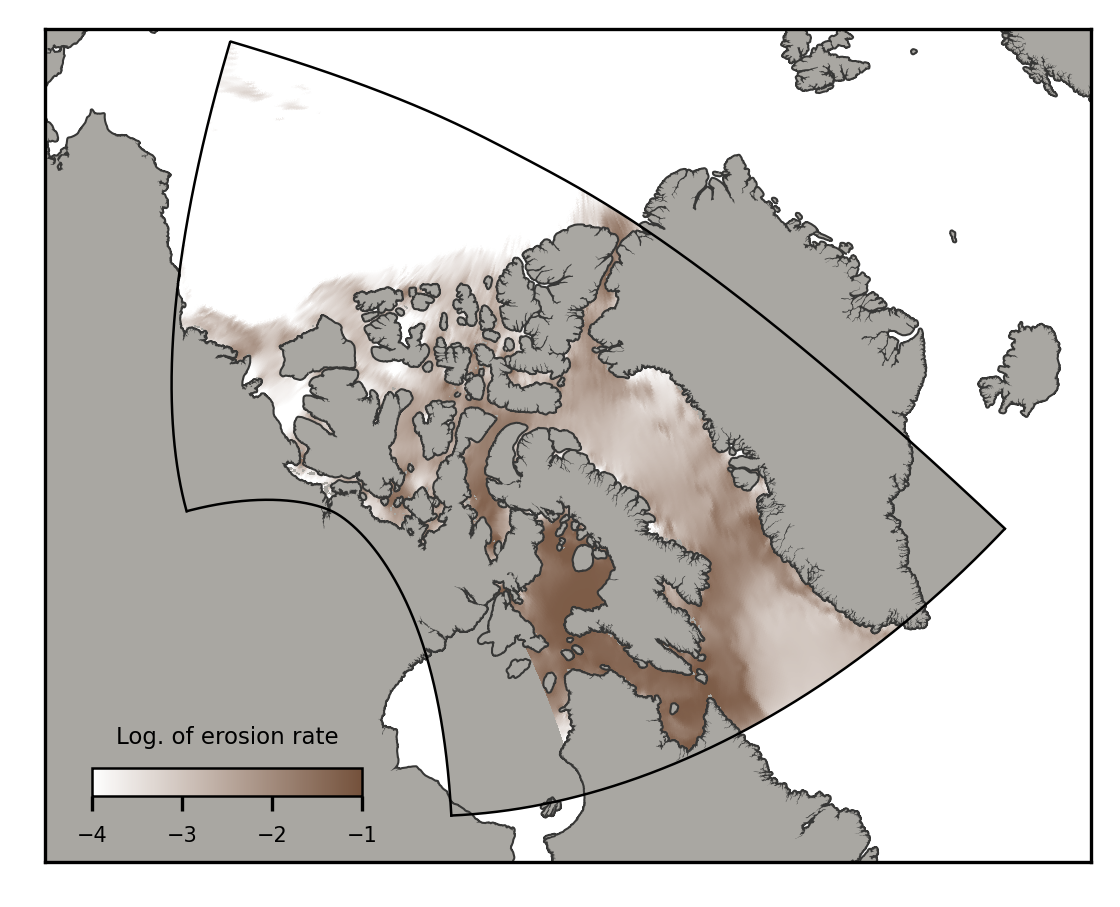

In [5]:
fig, ax1, proj1  = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb-map.pickle','rb'))
x_model, y_model = proj1(mesh_lon, mesh_lat) 

# Resuspension based on tidal stress:
CB = proj1.pcolormesh(x_model[imin:imax,jmin:jmax], y_model[imin:imax,jmin:jmax], np.log10(erosion[imin:imax,jmin:jmax]), \
                      cmap=sed_cmap, vmin=-4, vmax=-1)
proj1.pcolormesh(x_model[imin:imax,jmin:jmax], y_model[imin:imax,jmin:jmax], bathy_masked[0,imin:imax,jmin:jmax], \
                 cmap=ListedColormap([land_color]), vmin=0, vmax=1)

proj1.plot(x_model[imin:imax,jmin], y_model[imin:imax,jmin], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imin:imax,jmax], y_model[imin:imax,jmax], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imin,jmin:jmax], y_model[imin,jmin:jmax], 'k-', lw=0.6,zorder=5)
proj1.plot(x_model[imax,jmin:jmax], y_model[imax,jmin:jmax], 'k-', lw=0.6,zorder=5)

cbaxes1 = fig.add_axes([0.16, 0.19, 0.2, 0.025]) 
CB1 = plt.colorbar(CB, cax=cbaxes1, orientation='horizontal')
CB1.ax.tick_params(labelsize=5)
CB1.outline.set_linewidth(0.6)
CB1.ax.set_title('Log. of erosion rate', fontsize=5.5)

fig.savefig(f'{path_figure}S6.jpg', dpi=300, bbox_inches='tight')